
### Time Series Work book 3


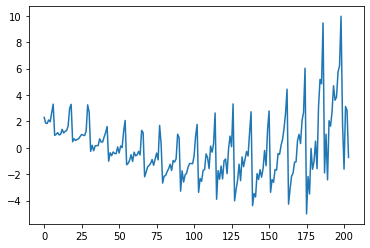

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dateutil.parser import parse
from scipy import signal

#Time.csv contains the monthly diabetic medication sale in australia
df =  pd.read_csv('time.csv',parse_dates=['date'])
detrended_linear = signal.detrend(df.value.values)

plt.plot(detrended_linear)





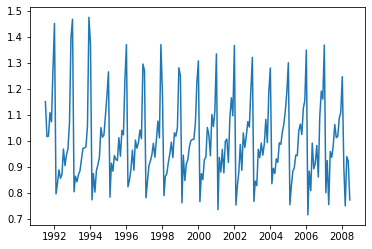

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

df =  pd.read_csv('time.csv',parse_dates=['date'],index_col=['date'])
res_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detren = df.value.values/res_mul.trend

plt.plot(detren)


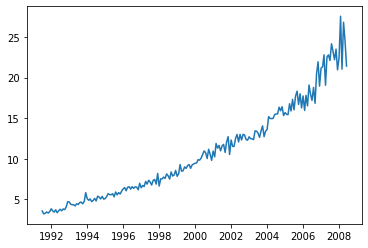

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

df =  pd.read_csv('time.csv',parse_dates=['date'],index_col=['date'])
res_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
deseasonal = df.value.values/res_mul.seasonal

plt.plot(deseasonal)


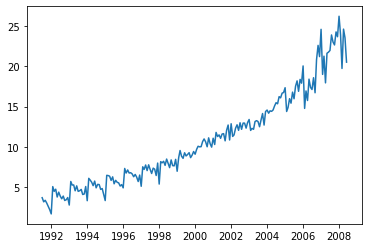

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

df =  pd.read_csv('time.csv',parse_dates=['date'],index_col=['date'])
res_mul = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')
deseasonalAdd= df.value.values-res_mul.seasonal

plt.plot(deseasonalAdd)

<AxesSubplot:title={'center':'Cubic Filled'}, xlabel='date'>

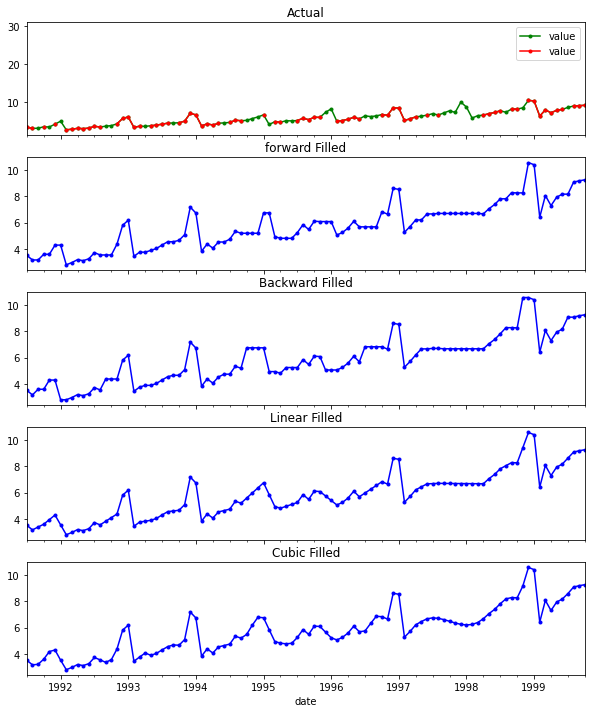

In [5]:
from scipy.interpolate import interp1d
import numpy as np
df_orig =  pd.read_csv('time.csv',parse_dates=['date'],index_col=['date'])
df =  pd.read_csv('time_missings.csv',parse_dates=['date'],index_col=['date'])
fig,axe = plt.subplots(5,1,sharex=True,figsize=(10,12))



df_orig.plot(title="Actual",ax=axe[0],label='Actual',color='green',style=".-")
df.plot(title="Actual",ax=axe[0],label='Missing',color='red',style=".-")

df_ff = df.ffill()
df_ff['value'].plot(title="forward Filled",ax=axe[1],label='Forward Filled',color='blue',style=".-")

df_bf = df.bfill()
df_bf['value'].plot(title="Backward Filled",ax=axe[2],label='Backward Filled',color='blue',style=".-")

df['rownum'] = np.arange(df.shape[0])
df.head()

df_nona = df.dropna(subset = ['value'])
temp = interp1d(df_nona['rownum'],df_nona['value'])
#print(temp)
df['linear'] = temp(df['rownum'])
df['linear'].plot(title="Linear Filled",ax=axe[3],label='Lin Filled',color='blue',style=".-")


temp2 = interp1d(df_nona['rownum'],df_nona['value'],kind='cubic')
#print(temp)
df['cubic'] = temp2(df['rownum'])
df['cubic'].plot(title="Cubic Filled",ax=axe[4],label='Cub Filled',color='blue',style=".-")


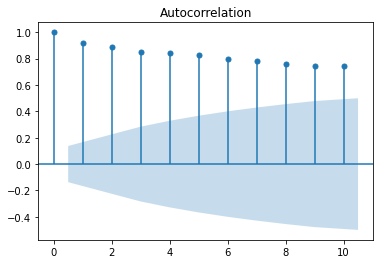

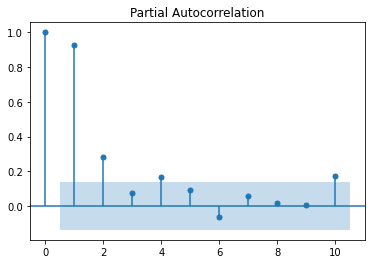

In [6]:
#Auto correlation
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
df =  pd.read_csv('time.csv',parse_dates=['date'],index_col=['date'])
plot_acf(df.value.tolist(),lags=10)
plot_pacf(df.value.tolist(),lags=10)
plt.show()
